In [3]:
import pandas as pd
import os
import pandas as pd
from GrBinaryIPF import GrBinaryIPF
import math
import matplotlib.pyplot as plt
from timeit import default_timer as timer

fpath =  "data/fantasy_football.pickle"

In [4]:
object = pd.read_pickle(fpath)

In [3]:
data = object[1]
num_of_player = 30
data = data[0:num_of_player]
data = data.transpose()
players = data.keys()
data

,Adam Thielen,Mike Evans,JuJu Smith-Schuster,Albert Wilson,Odell Beckham Jr.,Jarvis Landry,Courtland Sutton,Mohamed Sanu,Emmanuel Sanders,Tyler Boyd,...,Tyrell Williams,Dante Pettis,DeSean Jackson,Cooper Kupp,Alshon Jeffery,Julian Edelman,Josh Gordon,Donte Moncrief,Stefon Diggs,Brandin Cooks
Rank1,10,5,7,52,3,40,47,56,44,18,...,37,32,38,23,22,16,29,46,20,14
Rank2,9,4,8,52,2,34,40,56,46,19,...,37,32,39,18,25,13,23,48,29,12
Rank3,9,4,8,52,2,34,40,56,45,18,...,33,32,39,20,28,13,24,48,19,12
Rank4,9,7,6,52,5,32,43,55,42,16,...,37,33,39,19,24,13,23,46,21,12
Rank5,9,4,8,53,2,34,45,56,42,18,...,38,32,39,20,25,14,23,49,19,12
Rank6,8,1,6,52,2,32,43,57,42,21,...,39,31,38,18,22,16,24,50,19,13
Rank7,4,7,9,59,1,31,43,56,42,17,...,41,37,44,14,21,12,32,54,19,18
Rank8,9,4,6,52,5,35,45,55,50,20,...,40,30,38,18,21,16,24,48,22,13
Rank9,8,4,6,53,2,33,43,55,48,19,...,34,35,37,20,21,16,23,49,13,12
Rank10,12,4,8,55,2,34,40,56,49,21,...,39,35,32,27,20,15,17,50,19,13


In [4]:
itemList = data.keys()

In [5]:
itemList

Index(['Adam Thielen', 'Mike Evans', 'JuJu Smith-Schuster', 'Albert Wilson',
       'Odell Beckham Jr.', 'Jarvis Landry', 'Courtland Sutton',
       'Mohamed Sanu', 'Emmanuel Sanders', 'Tyler Boyd', 'Amari Cooper',
       'Robert Woods', 'Michael Thomas', 'Marvin Jones', 'Anthony Miller',
       'John Brown', 'Tyreek Hill', 'Julio Jones', 'Tre'Quan Smith',
       'DeAndre Hopkins', 'Tyrell Williams', 'Dante Pettis', 'DeSean Jackson',
       'Cooper Kupp', 'Alshon Jeffery', 'Julian Edelman', 'Josh Gordon',
       'Donte Moncrief', 'Stefon Diggs', 'Brandin Cooks'],
      dtype='object')

In [6]:
G1 = []
G2 = []
row = data.iloc[25, :]
for i in range(0,num_of_player):
    if(row[i] == 0):
        G1.append(players[i])
    else:
        G2.append(players[i])

In [7]:
p1 = len(G1)/len(itemList)
p2 = len(G2)/len(itemList)

In [8]:
rank = data.iloc[1, :]

In [9]:
ranktup = []
j = 0
for i in rank:
    ranktup.append((i,j))
    j = j + 1
ranktup.sort()
rank = []

for i,j in ranktup:
    rank.append(j)   


In [10]:
tup = []
for i in range(0,len(rank)):
    tup.append((rank[i],i))

In [11]:
tup.sort()

In [12]:
rank = []
for i,j in tup:
    rank.append(j)

In [13]:
group = row

In [14]:

def GrBinaryIPFDelta(rank,group):
    Rho0 = []
    Rho1 = []
    for i in rank:
        if group[i] == 1:
            Rho0.append(i)
        else:
            Rho1.append(i)

    j = 1
    rankDic = {}
    for itm in rank:
        rankDic[itm] = j
        j = j + 1

    urgent = []
    Rout = []
    P1count = 0
    P0count = 0

    Fp0 = len(Rho0)/len(rank)
    Fp1 = len(Rho1)/len(rank)

    i = 1
    while len(Rho0) != 0 or len(Rho1) != 0:
        if P1count >= len(Rho1):
            Rout.extend(Rho0[P0count:len(Rho0)])
            return Rout
        if P0count >= len(Rho0):
            Rout.extend(Rho1[P1count:len(Rho1)])
            return Rout

        if P1count < len(Rho1) and  P0count < len(Rho0):

            if len(urgent) == 0:
                if rankDic[Rho1[P1count]] < rankDic[Rho0[P0count]]:
                    Rout.append(Rho1[P1count])
                    P1count = P1count + 1
                else:
                    Rout.append(Rho0[P0count])
                    P0count = P0count + 1
            else:
                if urgent[0] == 'P1':
                    Rout.append(Rho1[P1count])
                    P1count = P1count + 1
                else:
                    Rout.append(Rho0[P0count])
                    P0count = P0count + 1
                urgent = []
        else:
            break
        # update urgent
        delta = 0

        if Fp1 * (i + 1) - P1count >= delta:
            urgent.append('P1')

        if Fp0 * (i + 1) - P0count >= delta:
            urgent.append('P0')
        i = i + 1
        #print(i)

    return  Rout

import timeit


def kendalTau(P,Q):
    qInv = {}
    pInv = {}
    for key in P:
        #print(key, P[key])
        val = P[key]
        pInv[val] = key
    for key in Q:
        #print(key, Q[key])
        val = Q[key]
        qInv[val] = key

    qTrans = {}
    #qTransInv = {}
    for key in Q:
        #print(key, Q[key])
        value = Q[key]
        newVal = pInv[value]
        qTrans[key] = newVal
        #qTransInv[newVal] = key

    dis = 0
    for key in qTrans:
        dis = dis + abs(key - qTrans[key])

    return dis









import pandas as pd

object = pd.read_pickle(r'data/top25_dfs.pickle')

data = object[1]
num_of_player = 50
#data = data[0:num_of_player]
data = data.transpose()
players = data.keys()

itemList = data.keys()
G1 = []
G2 = []
row = data.iloc[25, :num_of_player]
for i in range(0,num_of_player):
    if(row[i] == 0):
        G1.append(players[i])
    else:
        G2.append(players[i])

p1 = len(G1)/len(itemList)
p2 = len(G2)/len(itemList)


groupInfo = data.iloc[25, :]

playeridDic = {}
j = 0
for p in players :
    playeridDic[p] = j
    j = j + 1

# group = {}
# j = 0
# for i in groupInfo:
#     group[j] = i
#     j = j + 1

inputRankList = []





result = []
for rankIds in range(0,1):

    rankinfo = data.iloc[rankIds, :num_of_player]
    ranktup = []
    j = 0
    for i in rankinfo:
        ranktup.append((i, j))
        j = j + 1
    ranktup.sort()
    rank = []

    for i, j in ranktup:
        rank.append(j)


    group = {}
    for i in range(0,len(rank)):
        group[i] = groupInfo[i]


    rout = GrBinaryIPFDelta(rank, group)
    result.append((rank,rout))
    #print(rout)



import itertools

items = []
for i in range(0,len(rank)):
    items.append(i)
combinations = [p for p in itertools.product(items, repeat=2)]
print(len(combinations))

def KendallTau(P,Q,combinations):
    distance = 0
    for tup in combinations:
        if int(P[tup[0]]) < int(P[tup[1]]) and  int(Q[tup[1]]) < int(Q[tup[0]]):
            distance = distance + 1
    return distance


#rand rapf result
pick =  0 #random.randint(0,len(result) - 1)
#print(pick)
rankpicked,fairRankPicked =  result[pick]

distance  = 0
for rank, fairRank in result:

    P = {}
    Q = {}
    for i in range(0,len(rank)):
        P[rank[i]] = i
        Q[fairRankPicked[i]] = i

    distance = distance  + KendallTau(P,Q,combinations)

print(distance/len(result))

2500
79.0


In [15]:
Rout = GrBinaryIPF(rank,group)

[]
[19]
[19, 12]
[19, 12, 4]
[19, 12, 4, 40]
[19, 12, 4, 40, 2]
[19, 12, 4, 40, 2, 1]
[19, 12, 4, 40, 2, 1, 16]
[19, 12, 4, 40, 2, 1, 16, 17]
[19, 12, 4, 40, 2, 1, 16, 17, 0]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 25]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 25, 10]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 25, 10, 9]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 25, 10, 9, 48]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 25, 10, 9, 48, 28]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 25, 10, 9, 48, 28, 11]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 25, 10, 9, 48, 28, 11, 44]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 25, 10, 9, 48, 28, 11, 44, 24]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 25, 10, 9, 48, 28, 11, 44, 24, 23]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 25, 10, 9, 48, 28, 11, 44, 24, 23, 43]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 25, 10, 9, 48, 28, 11, 44, 24, 23, 43, 38]
[19, 12, 4, 40, 2, 1, 16, 17, 0, 29, 49, 

In [16]:
A = ['0','1']

In [17]:
P = {'0':p1,'1':p2}

In [18]:
S={}
for a in A:
   
    scoreList = []
    
    
    S[a] = scoreList

In [19]:
S = {A[0]:[],A[1]:[]}
score = len(rank)
for i in rank:
    if group[i] == 0:
        S[A[0]].append((score,i))
    else:
        S[A[1]].append((score,i)) 
    score = score - 1

In [20]:
def swap(dict,i,j):
    item = dict[i]
    dict[i] = dict[j]
    dict[j] = item 

In [21]:
import pandas as pd
import random
import math

import networkx as nx
from networkx.algorithms import bipartite

from timeit import default_timer as timer
#
#
# df1 = pd.read_csv('data/rn_1k_n_100.csv')
# df2 = pd.read_csv('data/1k_attribute.csv')
#
# group = df2['protected attribute']
#
# rankArray = {}
# for i in range(0,1000):
#     rankArray[i] = []
#
# for  i in range(0,10):
#     rArr = df1[str(i)]
#     for j in range(0,len(rArr)):
#         rankArray[j].append(rArr[j])


allMatch = []


import pandas as pd

object = pd.read_pickle(r'data/top25_dfs.pickle')

data = object[1]
num_of_player = 15
#data = data[0:num_of_player]
data = data.transpose()
players = data.keys()

itemList = data.keys()
G1 = []
G2 = []
row = data.iloc[25, :]
for i in range(0,num_of_player):
    if(row[i] == 0):
        G1.append(players[i])
    else:
        G2.append(players[i])

p1 = len(G1)/len(itemList)
p2 = len(G2)/len(itemList)


group = data.iloc[25, :]

playeridDic = {}
j = 0
for p in players :
    playeridDic[p] = j
    j = j + 1

inputRankList = []

start = timer()


for rankIds in range(1,25):

    rank = data.iloc[rankIds, :num_of_player]
    ranktup = []
    j = 0
    for i in rank:
        ranktup.append((i, j))
        j = j + 1
    ranktup.sort()
    rank = []

    rankord = {}
    for i, j in ranktup:
        rank.append(j)
        rankord[j] = str(i)

    inputRankList.append(rankord)

    rankGrp = {}
    for i in range(0,len(rank)):
        rankGrp[i] = row[i]




    numberOfItem = len(rank)
    numberOfGroup = 2

    #input






    grpCount = {}
    for i in group:
        grpCount[i] = 0


    rankGrpPos = {}
    for i in rank:
        grpCount[rankGrp[i]] = grpCount[rankGrp[i]] + 1
        rankGrpPos[i] = grpCount[rankGrp[i]]

    rankRange = {}
    delta = 0.0
    for item in rank:
        i = rankGrpPos[item]
        n = numberOfItem
        fp = grpCount[rankGrp[item]]
        #r1 = math.floor(i*n/fp)
        #r2 = math.ceil((i+1)*n/fp)

        r1 = math.floor((i -1 - delta) * n / fp) + 1
        r2 = math.ceil((i + delta) * n / fp)
        if r2 > numberOfItem:
            r2 = numberOfItem
        if r1 < 0:
            r1 = 0
        rankRange[item] = (r1,r2)


    B = nx.Graph()
    top_nodes = []
    bottom_nodes = []

    for i in rank:
        top_nodes.append(i)
        bottom_nodes.append(str(i))
    B.add_nodes_from(top_nodes, bipartite=0)
    B.add_nodes_from(bottom_nodes, bipartite=1)

    for i in rank:
        r1,r2 = rankRange[i]
        #print(r1,r2)
        for j in range(1,numberOfItem+1):
            if j >= r1 and j <= r2:
                #print(i,j)
                B.add_edge(i, str(j), weight = abs(i-j))
            else:
                B.add_edge(i, str(j), weight=1000000000)
                #print(i,j)

    my_matching = nx.algorithms.bipartite.minimum_weight_full_matching(B, top_nodes, "weight")
    allMatch.append(my_matching)
    #print(my_matching)



import itertools

items = []
for i in range(0,len(rank)):
    items.append(i)
combinations = [p for p in itertools.product(items, repeat=2)]
print(len(combinations))

def KendallTau(P,Q,combinations):


    distance = 0
    for tup in combinations:
        if int(P[tup[0]]) < int(P[tup[1]]) and  int(Q[tup[1]]) < int(Q[tup[0]]):
            distance = distance + 1
    return distance

minD = 10000000000
resRank = None
for rank1 in allMatch:
    d = 0
    for rank2 in inputRankList:
        d = d + KendallTau(rank1, rank2, combinations)
    d = d / len(inputRankList)
    print('ktau = ', d)
    if d < minD:
        minD = d
        resRank = rank1

print('min ktau = ', minD)
end = timer()
print('time required = ', end - start)


print(resRank)

225
ktau =  15.291666666666666
ktau =  15.291666666666666
ktau =  15.291666666666666
ktau =  15.291666666666666
ktau =  16.041666666666668
ktau =  20.125
ktau =  15.541666666666666
ktau =  15.541666666666666
ktau =  13.208333333333334
ktau =  16.791666666666668
ktau =  16.041666666666668
ktau =  16.125
ktau =  15.291666666666666
ktau =  13.208333333333334
ktau =  12.958333333333334
ktau =  16.125
ktau =  16.708333333333332
ktau =  16.875
ktau =  15.291666666666666
ktau =  15.291666666666666
ktau =  15.291666666666666
ktau =  15.291666666666666
ktau =  16.458333333333332
ktau =  17.625
min ktau =  12.958333333333334
time required =  0.1625055999999998
{0: '6', 1: '2', 2: '4', 3: '11', 4: '3', 5: '8', 6: '9', 7: '13', 8: '14', 9: '7', 10: '5', 11: '10', 12: '1', 13: '12', 14: '15', '6': 0, '2': 1, '4': 2, '11': 3, '3': 4, '8': 5, '9': 6, '13': 7, '14': 8, '7': 9, '5': 10, '10': 11, '1': 12, '12': 13, '15': 14}


In [28]:
result

,1,2,3,4,5
0,99,46,8,1,0
1,0,1,2,3,4


In [34]:
res = pd.read_csv("Fig_4a_result.csv")
y = list(res.iloc[0, :])
x = list(res.iloc[1, :])

In [35]:
# P={}
# Q = {}
# #Rout.append(8)
# import itertools
# allids = []
# for i in range(0,len(Rout)):
#     allids.append(i)
    
# for i in range(0, len(Rout)):
#     P[Rout[i]] = i
#     Q[rank[i]] = i

# KendallTau(P,Q,allids)

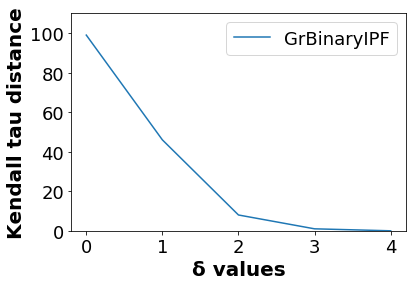

In [36]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
#0	1	2	3	4
#99	46	8	1	0


plt.plot(x,y)
#plt.plot(x,z)
# create an index for each tick position
plt.ylabel('Kendall tau distance',fontweight='bold',fontsize=20)
plt.xlabel('\u03B4 values',fontweight='bold',fontsize=20)

#plt.xticks([100,20,30,40,50], ['10','20','30','40','50'])
#plt.yticks([0,10,20,30,40], ['0','10','20','30',''])
plt.ylim([0, 110])
plt.legend(["GrBinaryIPF"],fontsize=18)
#fig.savefig("newfig/fig_4/new/GrBinaryIPF_vary_delta_fantasy.png", bbox_inches='tight', dpi=480)
plt.show()